In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
df = pd.read_csv('datasets/car_review.csv')
df.head(6)

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,sentiment
0,Ugztvgn0RSpPSvfcjP94AaABAg,The reason for less sound ending is weight sav...,9 days ago,@unlimiteddevotion1551,UCKu6szKRlISd6GhfGSrCmUg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lZCwccuu9dAOob...,False,False,1.750495e+09,Positive
1,UgxwJ6XRlo1WQxWG9Qp4AaABAg,all proper modern sportscars must have a limit...,9 days ago,@unlimiteddevotion1551,UCKu6szKRlISd6GhfGSrCmUg,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lZCwccuu9dAOob...,False,False,1.750495e+09,Negative
2,UgyT9DHD0B_ksItuxeN4AaABAg,Porsche sounded like a vacuum cleaner. Come on...,3 weeks ago,@isaachy777,UCFiw9yudu-jZNdE3MwODQLA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_n6fRBDZipVeVwc...,False,False,1.749459e+09,Positive
3,UgyC3KRLC-6E-1Bt8Rl4AaABAg,2025 \nM3 - $85k USD\n911 - $150k USD,1 month ago,@SeBro999,UCy8T-EDjp9dCa1ZXEiDUF6A,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mH2h-if7zcMV2k...,False,False,1.748595e+09,Neutral
4,UgwoCoOESr326z89Fwl4AaABAg,M3🎉,1 month ago,@alvarolima960,UCMd49xWuZnjCGQxmbJeUbYw,0,NaN,https://yt3.ggpht.com/noTBcLxverveYJoOEXeCpYnj...,False,False,1.748595e+09,Positive
5,UgxRgUfeE00Ja0q3gFt4AaABAg,I have a g80 m3 comp rwd....there is a lot of ...,2 months ago,@robspring81,UCJgGCrtMYz2mZZnCHGNb_Ww,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lvM58LsnZc3OTK...,False,False,1.746003e+09,Negative


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))
    if score['compound'] > 0.05:
        return "Positive"
    elif score['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['text'].apply(get_sentiment)
print(df['sentiment'].value_counts())

sentiment
Positive    751
Neutral     464
Negative    262
Name: count, dtype: int64


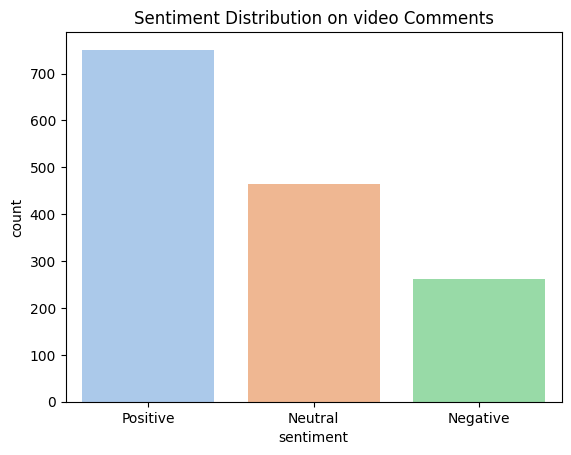

In [6]:
sns.countplot(data=df, x="sentiment", order=["Positive", "Neutral", "Negative"], palette="pastel")
plt.title("Sentiment Distribution on video Comments")
plt.show()

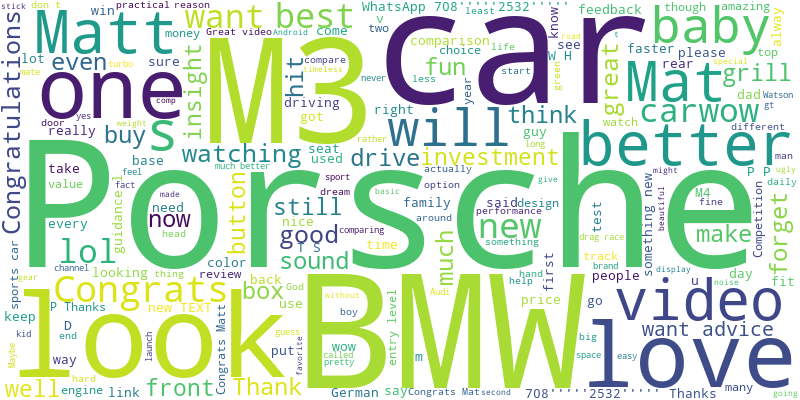

In [7]:
from wordcloud import WordCloud

# Positive
positive_text = " ".join(df[df['sentiment'] == "Positive"]['text'].astype(str))
WordCloud(width=800, height=400, background_color='white').generate(positive_text).to_image()

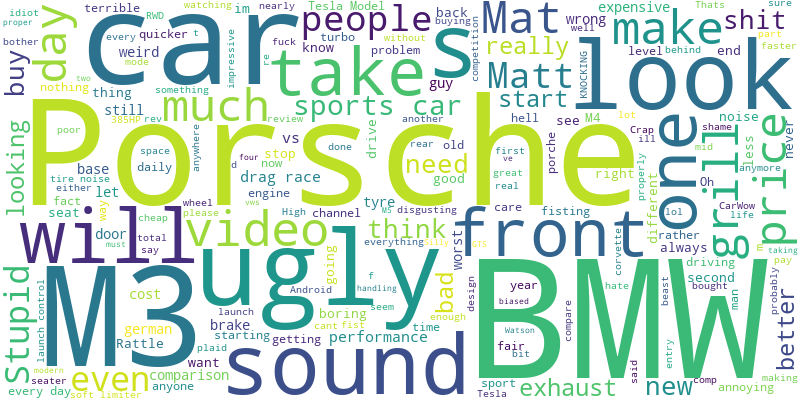

In [8]:
# Negative
negative_text = " ".join(df[df['sentiment'] == "Negative"]['text'].astype(str))
WordCloud(width=800, height=400, background_color='white').generate(negative_text).to_image()

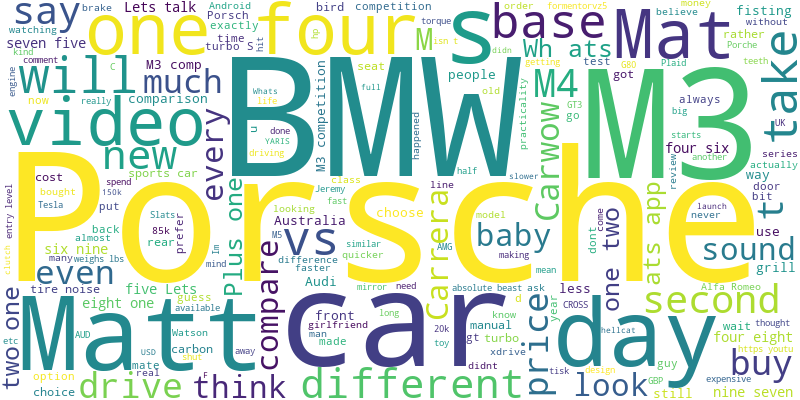

In [9]:
# Negative
neutral_text = " ".join(df[df['sentiment'] == "Neutral"]['text'].astype(str))
WordCloud(width=800, height=400, background_color='white').generate(neutral_text).to_image()

In [10]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# preprocessing
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stopwords.words('english') and word.isalpha()]

In [ ]:
# Clean words in positive comments
positive_words = df[df['sentiment'] == "Positive"]['text'].dropna().apply(clean_text)
positive_w = [word for sublist in positive_words for word in sublist]

# Clean words in negative comments
negative_words = df[df['sentiment'] == "Negative"]['text'].dropna().apply(clean_text)
negative_w = [word for sublist in negative_words for word in sublist]

In [ ]:
# count no of common words
top_positive = Counter(positive_w).most_common(20)
top_negative = Counter(negative_w).most_common(20)

df_pos = pd.DataFrame(top_positive, columns=['word', 'count'])
df_neg = pd.DataFrame(top_negative, columns=['word', 'count'])

print(df_pos.head(2))
print(df_neg.head(2))

      word  count
0  porsche    170
1      bmw    133
      word  count
0      bmw     72
1  porsche     61


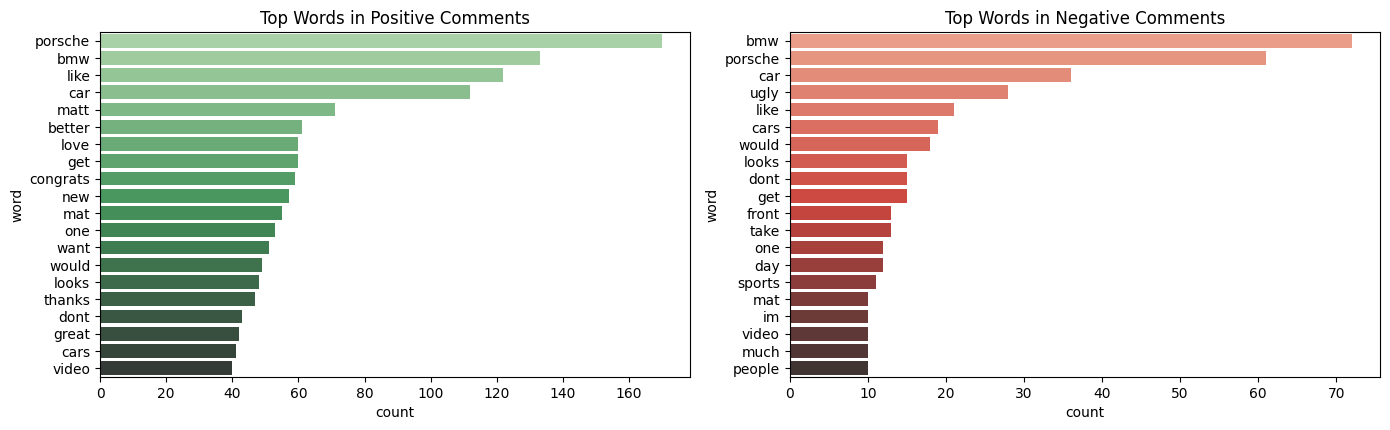

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=df_pos, x='count', y='word', palette="Greens_d")
plt.title("Top Words in Positive Comments")

plt.subplot(2, 2, 2)
sns.barplot(data=df_neg, x='count', y='word', palette="Reds_d")
plt.title("Top Words in Negative Comments")
plt.tight_layout()